<img src="https://github.com/FarzadNekouee/Enhanced_MRI_Tumor_Classification_Web_App/blob/master/cover_image/cover_image.png?raw=true" width="2400">

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>🔍 Enhanced MRI Brain Tumor Classification</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this project, we focus on creating a machine learning model that reliably identifies normal and various tumor-affected brain images, such as pituitary, meningioma, and glioma tumors. Understanding the necessity for accurate diagnoses in regions with limited medical imaging quality, our objective extends to ensuring the model's high performance on low-quality images, thus promoting excellent generalization and utility in diverse healthcare settings.</p>
</div>

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>🎯 Project Objectives</b></h1>
    <ul style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        <li><strong>Dataset Exploration:</strong> Examine class balances and image dimensions to understand dataset characteristics.</li>
        <li><strong>Training on Degraded Image Quality:</strong> Enhance model robustness to low-quality images with controlled degradation techniques.</li>
        <li><strong>Transfer Learning for Accuracy:</strong> Use ResNet50V2 pre-trained model for high accuracy without overfitting, despite a limited dataset.</li>
        <li><strong>Focused Model Training and Fine-Tuning:</strong> Strategically train and fine-tune the model for reliable MRI image classification.</li>
        <li><strong>Validation Performance Validation:</strong> Evaluate the model thoroughly on a validation set to ensure dependable performance.</li>
        <li><strong>Model Deployment Readiness:</strong> Prepare the model for real-world application by saving and archiving for deployment.</li>
    </ul>
</div>


<a id="contents_tabel"></a>   

<div style="background-color:#e9eef2; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>📋 Table of Contents</b></h1>
    <ul style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        <li><a href="#Initialization" style="text-decoration: none;">Step 1 | Setup and Initialization</a></li>
        <li><a href="#Analysis" style="text-decoration: none;">Step 2 | Dataset Analysis</a></li>
        <li><a href="#Preparation" style="text-decoration: none;">Step 3 | Dataset Preparation</a>
            <ul>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 3.1 | Centralizing Dataset Information</a></li>
                <li><a href="#Split" style="text-decoration: none;">Step 3.2 | Data Splitting into Training & Validation Sets</a></li>
                <li><a href="#Augmentation" style="text-decoration: none;">Step 3.3 | Augmentation of Dataset with Artificially Degraded Images</a></li>
                <li><a href="#Preprocessing" style="text-decoration: none;">Step 3.4 | Establishing Data Generators for Model Input</a></li>
            </ul>
        </li>
        <li><a href="#Model" style="text-decoration: none;">Step 4 | Model Architecture Development</a></li>
        <li><a href="#Train" style="text-decoration: none;">Step 5 | Full Model Training and Fine-Tuning</a></li>
        <li><a href="#Performance" style="text-decoration: none;">Step 6 | Model Performance Assessment</a>
            <ul>
                <li><a href="#Curves" style="text-decoration: none;">Step 6.1 | Visualizing the Learning Curves</a></li>
                <li><a href="#Metrics" style="text-decoration: none;">Step 6.2 | Performance Metrics Assessment</a></li>
            </ul>
        </li>
        <li><a href="#Save" style="text-decoration: none;">Step 7 | Saving the Model for Deployment</a></li>
    </ul>
</div>


<h2 align="left"><font color=#102C42>Let's get started:</font></h2>

<a id="Initialization"></a>
# <p style="background-color: #102C42; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">First of all, let's import all the necessary libraries needed for our project:</p>
</div>

In [1]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import cv2
import random
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import FileLink, display

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#e9eef2'}, style='darkgrid')

<a id="Analysis"></a>
# <p style="background-color: #102C42; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Dataset Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Now, I am transferring our MRI image dataset from Kaggle's dataset location to our current working directory to start analyzing and processing it:</p>
</div>

In [3]:
# Copying the dataset from the Kaggle input folder to the working directory
!cp -r /kaggle/input/mri-images/Data /kaggle/working/

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Then, I am going to do initial analysis to examine the distribution of image classes within the dataset:</p>
</div>

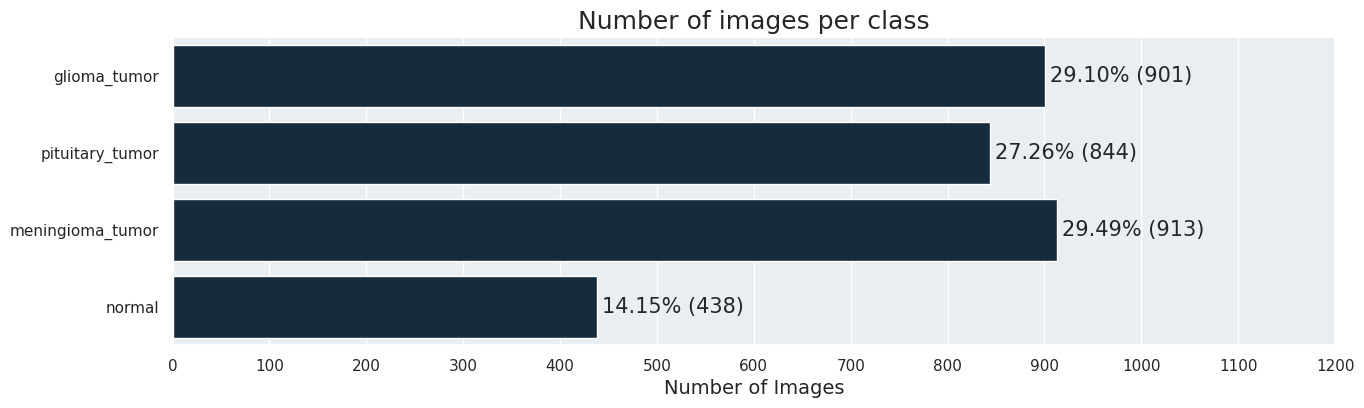

In [4]:
# Directory where the image folders are located
base_dir = '/kaggle/working/Data'

# Obtain class names from the folder names in base_dir
classes = [folder_name for folder_name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder_name))]

# Counting the number of images in each folder
counts = []
for class_name in classes:
    folder_path = os.path.join(base_dir, class_name)
    counts.append(len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]))

# Calculating the total number of images
total_count = sum(counts)

# Calculating the percentages
percentages = [(count / total_count) * 100 for count in counts]

# Set the figure size
plt.figure(figsize=(15, 4))

# Create a horizontal bar plot
ax = sns.barplot(y=classes, x=counts, orient='h', color='#102C42')

# Set x-axis interval (adjust as needed)
ax.set_xticks(range(0, max(counts) + 1, 1000))

# Annotate each bar with the count and percentage
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2., 
            '{:1.2f}% ({})'.format(percentages[i], counts[i]),
            va="center", fontsize=15)

# Set the x-label for the plot
plt.xlabel('Number of Images', fontsize=14)

# Set x-axis interval
ax.set_xticks(range(0, max(counts) + 300, 100))

# Set the title and show the plot
plt.title("Number of images per class", fontsize=18)
plt.show()

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>📊 Class Distribution Insights</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        The 'normal' class, being the least represented in the dataset, could be critical in ensuring balanced model performance. As we proceed, special attention may be needed in model training to mitigate any potential bias towards the more prevalent classes.
    </p>
</div>

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Then, I will proceed to analyze the dimensions of the images:</p>
</div>

In [5]:
# Lists to store heights and widths of all images
heights = []
widths = []

# Initialize sets to store unique dimensions
unique_dims = set()

# Loop over each class and their respective images
for class_name in classes:
    folder_path = os.path.join(base_dir, class_name)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Add the dimensions (height, width, channels) to the set
            unique_dims.add((img.shape[0], img.shape[1]))
            
            # Append heights and widths for statistical calculations
            heights.append(img.shape[0])
            widths.append(img.shape[1])

# Check if all images have the same dimension
if len(unique_dims) == 1:
    print(f"All images have the same dimensions: {list(unique_dims)[0]}")
else:
    print(f"There are {len(unique_dims)} different image dimensions in the dataset.")
    print(f"Min height: {min(heights)}, Max height: {max(heights)}, Mean height: {np.mean(heights):.2f}")
    print(f"Min width: {min(widths)}, Max width: {max(widths)}, Mean width: {np.mean(widths):.2f}")

All images have the same dimensions: (256, 256)


<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>🔍 Image Dimension Analysis</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        Uniformity in image dimensions (256x256) across the dataset simplifies preprocessing and ensures consistent input shape for model training, enabling more streamlined augmentation and scaling procedures.
    </p>
</div>

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        Next, lets take a look at the images across all four classes to get a visual feel for the data we're working with:
    </p>
</div>


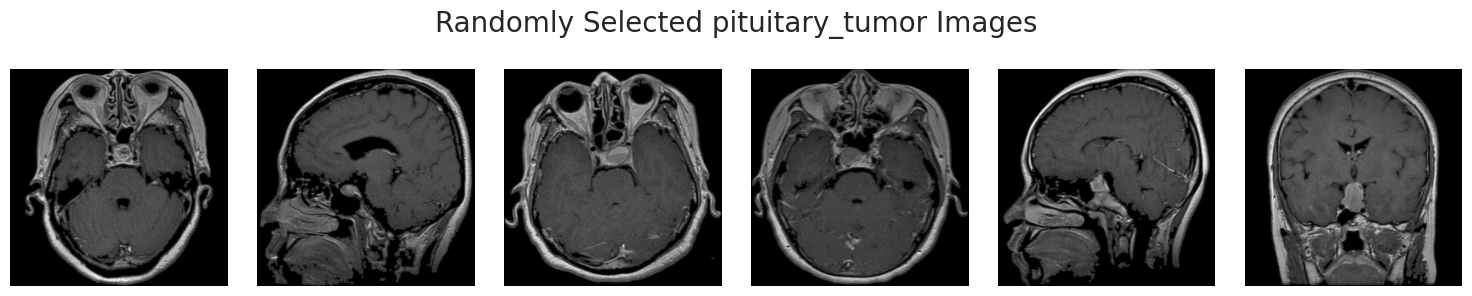

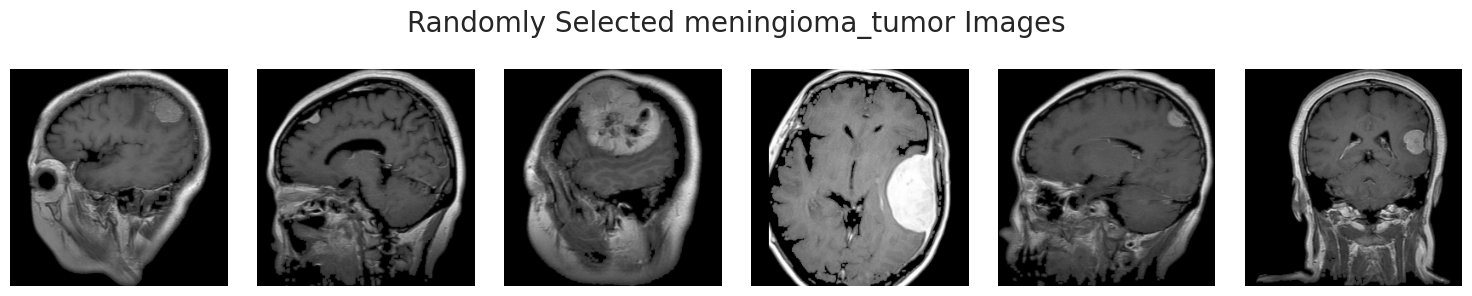

In [6]:
# Function to plot images
def plot_images(images, title):
    plt.figure(figsize=(15, 3)) 
    for i, img_path in enumerate(images):
        plt.subplot(1, 6, i+1)  # 1x5 subplot
        img = cv2.imread(img_path)
        # Convert the BGR image to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

# Setting the random seed for reproducibility
np.random.seed(42)

# Loop over each class and plot random images
for class_name in classes:
    folder_path = os.path.join(base_dir, class_name)
    all_images = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
    random_images = np.random.choice(all_images, 6, replace=False)  # Choose 6 images randomly
    plot_images(random_images, f"Randomly Selected {class_name} Images")

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>🖼️ Visual Sample of MRI Scans</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        A glimpse into the dataset reveals a grayscale palette, typical of MRI scans, providing detailed insights into the different classes of brain images.
    </p>
</div>

<a id="Preparation"></a>
# <p style="background-color: #102C42; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Preparation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="Centralizing"></a>
# <b><span style='color:#769bb8'>Step 3.1 |</span><span style='color:#102C42'> Centralizing Dataset Information</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        First of all, I am going to centralize the dataset's information into a DataFrame. This makes it easier to manage and process the data in the subsequent steps:
    </p>
</div>

In [7]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop over each class and append the image file paths with their respective labels to the data list
for class_name in classes:
    folder_path = os.path.join(base_dir, class_name)
    data.extend([(os.path.join(folder_path, filename), class_name) for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))])

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

filepath         label
0  /kaggle/working/Data/glioma_tumor/G_872.jpg  glioma_tumor
1  /kaggle/working/Data/glioma_tumor/G_445.jpg  glioma_tumor
2  /kaggle/working/Data/glioma_tumor/G_159.jpg  glioma_tumor
3  /kaggle/working/Data/glioma_tumor/G_487.jpg  glioma_tumor
4  /kaggle/working/Data/glioma_tumor/G_475.jpg  glioma_tumor

In [8]:
print("Total number of images:", df.shape[0])

Total number of images: 3096


In [9]:
# Deleting unnecessary variables to free up memory
del data, all_images

<a id="Split"></a>
# <b><span style='color:#769bb8'>Step 3.2 |</span><span style='color:#102C42'> Data Splitting into Training & Validation Sets</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Then, I am going to split our dataset into train and validation sets, ensuring a balanced class distribution with stratification and mixing the images for randomness using shuffling:
    </p>
</div>

In [10]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Display the shape of the training and validation sets
print("Training data shape:", train_df.shape)
print("Validation data shape:", val_df.shape)

# Deleting the original DataFrame to free up memory
del df

Training data shape: (2476, 2)
Validation data shape: (620, 2)


In [11]:
# Display the first few rows of the train DataFrame
train_df.head(10)

filepath             label
2371   /kaggle/working/Data/meningioma_tumor/M_70.jpg  meningioma_tumor
2056  /kaggle/working/Data/meningioma_tumor/M_735.jpg  meningioma_tumor
828       /kaggle/working/Data/glioma_tumor/G_277.jpg      glioma_tumor
2372  /kaggle/working/Data/meningioma_tumor/M_890.jpg  meningioma_tumor
1683   /kaggle/working/Data/pituitary_tumor/P_413.jpg   pituitary_tumor
545        /kaggle/working/Data/glioma_tumor/G_89.jpg      glioma_tumor
696       /kaggle/working/Data/glioma_tumor/G_290.jpg      glioma_tumor
481       /kaggle/working/Data/glioma_tumor/G_282.jpg      glioma_tumor
1877  /kaggle/working/Data/meningioma_tumor/M_805.jpg  meningioma_tumor
3042            /kaggle/working/Data/normal/N_226.jpg            normal

In [12]:
# Display the first few rows of the validation DataFrame
val_df.head(10)

filepath             label
1437   /kaggle/working/Data/pituitary_tumor/P_177.jpg   pituitary_tumor
2340    /kaggle/working/Data/meningioma_tumor/M_9.jpg  meningioma_tumor
1784  /kaggle/working/Data/meningioma_tumor/M_466.jpg  meningioma_tumor
1742     /kaggle/working/Data/pituitary_tumor/P_2.jpg   pituitary_tumor
273       /kaggle/working/Data/glioma_tumor/G_714.jpg      glioma_tumor
85        /kaggle/working/Data/glioma_tumor/G_176.jpg      glioma_tumor
1855  /kaggle/working/Data/meningioma_tumor/M_623.jpg  meningioma_tumor
2026  /kaggle/working/Data/meningioma_tumor/M_865.jpg  meningioma_tumor
1452   /kaggle/working/Data/pituitary_tumor/P_279.jpg   pituitary_tumor
1887  /kaggle/working/Data/meningioma_tumor/M_839.jpg  meningioma_tumor

<a id="Augmentation"></a>
# <b><span style='color:#769bb8'>Step 3.3 |</span><span style='color:#102C42'> Augmentation of Dataset with Artificially Degraded Images</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>🛠️ Preparing for Low-Quality Image Analysis</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Considering our deep learning project on brain tumor MRI may be used in areas with low-quality imaging resources, I aim to ensure our model performs accurately with such images. To simulate lower-quality MRIs, I'll employ three techniques:
    </p>
    <ul style="font-size:20px; font-family:calibri; line-height:1.5em;">
        <li><strong>1️⃣ Adding Noise:</strong> To replicate common imaging artifacts, I'll introduce variations like Gaussian noise noise.</li>
        <li><strong>2️⃣ Applying Blur:</strong> Gaussian or motion blur will be used to mimic the blurring effect caused by patient movement or imaging hardware constraints.</li>
        <li><strong>3️⃣ Downsampling:</strong> I'll reduce the image resolution to represent the capabilities of less advanced MRI machinery typically found in under-resourced settings.</li>
    </ul>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Moving forward, I'll apply above techniques to our image dataset, targeting both training and testing sets separately. This step is key to understanding how our model performs on degraded images, simulating real-world scenarios where image quality varies. Crucially, we're doing these modifications after splitting the data into training and testing sets. This approach prevents <strong>data leakage</strong>, ensuring that our model's performance evaluation is genuine and not influenced by having seen similar images during training. It's about making sure the model truly learns and generalizes, rather than just memorizing.
    </p>
</div>


<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>📉 Setting the Degree of Image Quality Reduction</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        To prepare our model for the variable quality of medical imaging in less equipped regions, specific adjustments will be made to our images:
    </p>
    <ul style="font-size:20px; font-family:calibri; line-height:1.5em;">
        <li><strong>1️⃣ Adding Noise:</strong> The amount of noise added should be noticeable but not so overwhelming that the key features of the image are obscured. For MRI images, a small to moderate amount of Gaussian noise is often realistic. I will start with a Gaussian noise with a mean of 0 and a small standard deviation (like 0.01 to 0.05 of the pixel value range) and adjust based on the results.</li>
        <li><strong>2️⃣ Blurring:</strong> For blurring, a Gaussian blur with a small kernel size (e.g., 3x3 or 5x5) can simulate slight focus issues or patient movement. The degree of blur should be enough to reduce sharpness without completely erasing critical details.</li>
        <li><strong>3️⃣ Downsampling:</strong> When downsampling, reducing the image resolution by a factor (e.g., to half or one-third of the original dimensions) and then resizing back to the original size can simulate lower resolution. The key is to degrade the image's clarity while retaining its overall structure.</li>
    </ul>
</div>


In [13]:
def add_gaussian_noise(image, mean=0, std=0.05):
    """ Add Gaussian noise to an image """
    gauss = np.random.normal(mean, std, image.shape)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

In [14]:
def apply_blur(image, kernel_size=5):
    """ Apply Gaussian blur to an image """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [15]:
def downsample_upsample(image, scale_percent=50):
    """ Downsample and then upsample an image """
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return cv2.resize(resized, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_LINEAR)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Before applying modifications, lets find the total number of images:
    </p>
</div>


In [16]:
def count_images(dataframe):
    """ Function to count the total number of images in a DataFrame """
    return dataframe.shape[0]

In [17]:
# Count and print the number of images in the training and validation sets before the modifications
total_train_images = count_images(train_df)
total_val_images = count_images(val_df)

print(f"Total number of training images: {total_train_images}")
print(f"Total number of validation images: {total_val_images}")

Total number of training images: 2476
Total number of validation images: 620


<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        To address common image quality challenges in less equipped regions, we'll enhance our dataset. I'll randomly apply one or two or all the three image quality reduction techniques to each image randomly, then incorporate these altered images back into our original dataset. This approach effectively doubles the number of images, enriching our dataset with a range of qualities that mirror real-life conditions:
    </p>
</div>


In [18]:
def augment_images(dataframe, base_dir):
    modified_data = []
    
    for _, row in dataframe.iterrows():
        img_path = row['filepath']
        label = row['label']
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Randomly apply one or more degradation methods
        choices = ['noise', 'blur', 'downsample']
        chosen_methods = random.sample(choices, k=random.randint(1, len(choices)))

        if 'noise' in chosen_methods:
            img = add_gaussian_noise(img)
        if 'blur' in chosen_methods:
            img = apply_blur(img)
        if 'downsample' in chosen_methods:
            img = downsample_upsample(img)

        # Save the new image with a modified name
        directory, filename = os.path.split(img_path)
        new_img_path = os.path.join(directory, f"modified_{filename}")
        cv2.imwrite(new_img_path, img)

        # Append the new image path and its label to the list
        modified_data.append((new_img_path, label))

    # Create a DataFrame with the modified images and their respective labels
    modified_images_df = pd.DataFrame(modified_data, columns=['filepath', 'label'])

    # Return the updated DataFrame with both original and modified images
    return pd.concat([dataframe, modified_images_df], ignore_index=True)

In [19]:
# Apply augmentation and update the training and validation datasets
train_df = augment_images(train_df, base_dir)
val_df = augment_images(val_df, base_dir)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Lets count the number of images in our dataset again after applying the modifications:
    </p>
</div>


In [20]:
# Count and print the number of images in the training and validation sets after the modifications
total_train_images = count_images(train_df)
total_val_images = count_images(val_df)

print(f"Total number of training images: {total_train_images}")
print(f"Total number of validation images: {total_val_images}")

Total number of training images: 4952
Total number of validation images: 1240


<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Now, let's take a look at a random selection of images from each class post-transformation. It's crucial to check that the important tumor characteristics remain visible, ensuring our model can still accurately detect and learn from these varied conditions:
    </p>
</div>


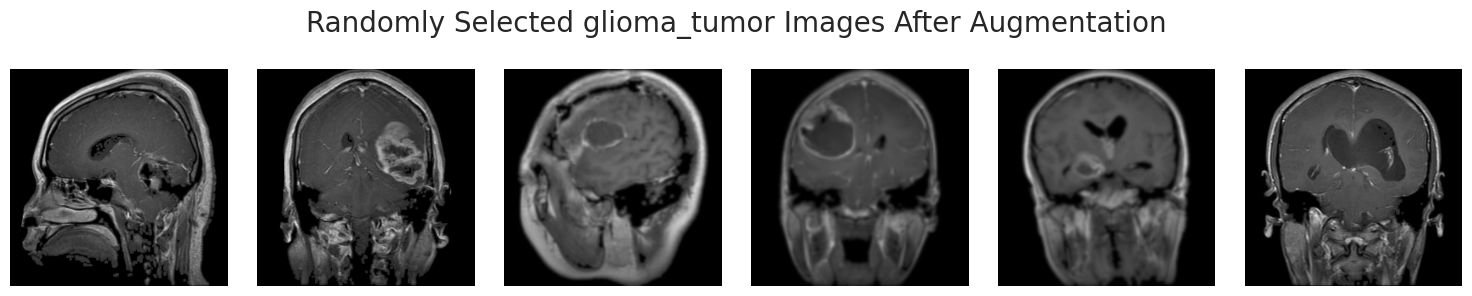

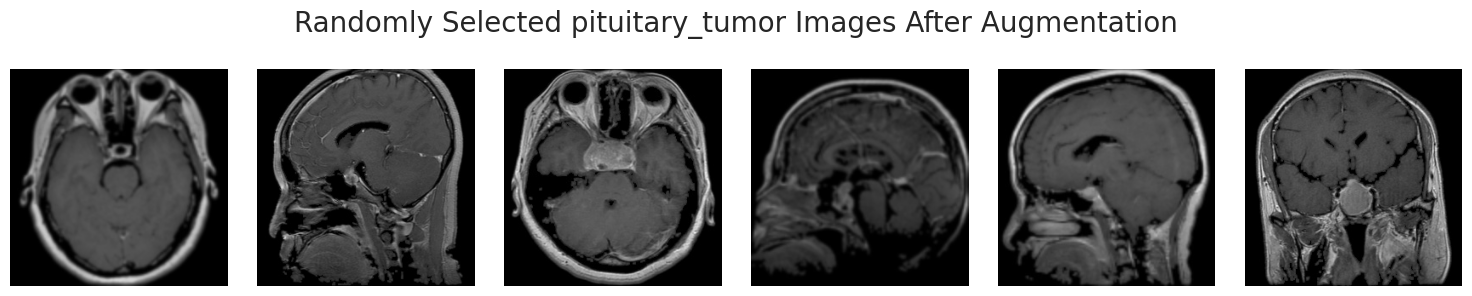

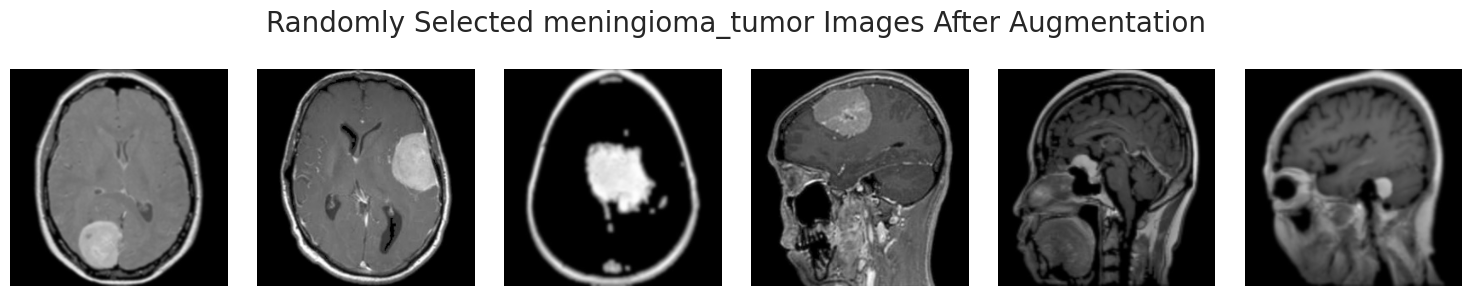

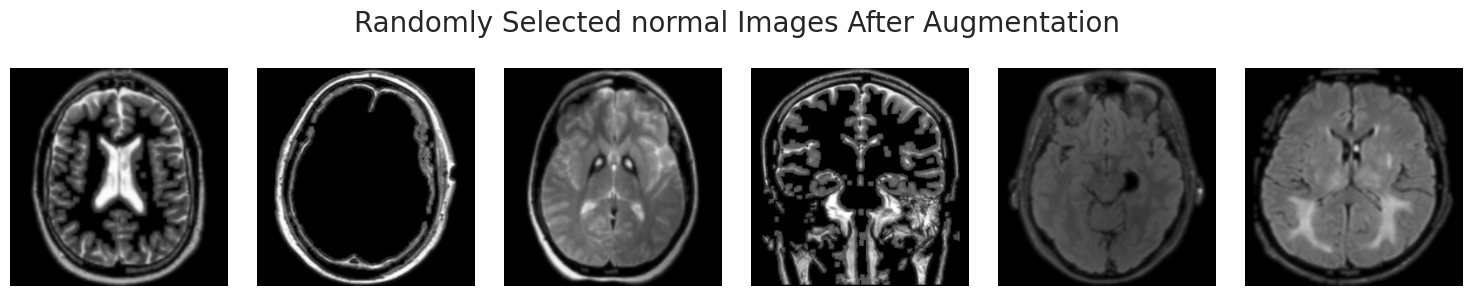

In [21]:
# Loop over each class and plot random images
for class_name in classes:
    folder_path = os.path.join(base_dir, class_name)
    all_images = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
    random_images = np.random.choice(all_images, 6, replace=False)  # Choose 6 images randomly
    plot_images(random_images, f"Randomly Selected {class_name} Images After Augmentation")

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>🖼️ Visual Assessment Post-Transformation</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Observing the randomly selected images post-transformation, it's evident that we've successfully introduced variations in quality, simulating real-world degradation.
    </p>
</div>


 <a id="Preprocessing"></a>
# <b><span style='color:#769bb8'>Step 3.4 |</span><span style='color:#102C42'> Establishing Data Generators for Model Input</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Finally, in the dataset preparation phase, I am crafting a streamlined pipeline using Keras's <strong>ImageDataGenerator</strong>. This setup is designed to dynamically preprocess and augment images <strong>on-the-fly</strong> during training, which is a memory-efficient approach. For our MRI images, we're incorporating specific augmentations to mimic realistic variations: slight rotations to represent patient positioning, small shifts in width and height for different scan angles, zooming to simulate scan focus variations, and horizontal flips when image laterality isn't a factor. These carefully chosen augmentations ensure the preservation of critical medical information while enhancing the model's ability to generalize. The function is tailored to preprocess images optimally for the neural network we're training.
    </p>
</div>

In [22]:
def create_data_generators(train_df, val_df, preprocessing_function=None, batch_size=32, image_dimensions=(224, 224)):
    """
    Creates and returns training and validation data generators with optional preprocessing.
    
    Parameters:
    - train_df (DataFrame): DataFrame containing training data.
    - val_df (DataFrame): DataFrame containing validation data.
    - preprocessing_function (function, optional): Preprocessing function specific to a model. Defaults to None.
    - batch_size (int, optional): Number of images per batch for the generators. Defaults to 32.
    - image_dimensions (tuple, optional): Dimensions to which the images will be resized (height, width). Defaults to (224, 224).
    
    Returns:
    - train_generator (ImageDataGenerator): Generator for training data.
    - val_generator (ImageDataGenerator): Generator for validation data.
    
    Notes:
    - The validation generator does not use any augmentations.
    - If provided, the preprocessing function is applied to both generators.
    """

    # Define the training data generator with appropriate augmentations
    train_datagen = ImageDataGenerator(
        rotation_range=20,                           # Rotate images by up to 20 degrees
        width_shift_range=0.10,                      # Shift images horizontally by up to 10% of their width
        height_shift_range=0.10,                     # Shift images vertically by up to 10% of their height
        zoom_range=0.10,                             # Zoom in/out by up to 10%
        horizontal_flip=True,                        # Allow horizontal flipping
        preprocessing_function=preprocessing_function
    )

    # Define the validation data generator without any augmentations
    val_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_function
    )

    # Create an iterable generator for training data
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,                 # DataFrame containing training data
        x_col="filepath",                   # Column with paths to image files
        y_col="label",                      # Column with image labels
        target_size=image_dimensions,       # Resize all images to size of 224x224 
        batch_size=batch_size,              # Number of images per batch
        class_mode='categorical',           # Specify multi-class classification task
        seed=42,                            # Seed for random number generator to ensure reproducibility
        shuffle=True                        # Shuffle the data to ensure the model gets a randomized batch during training
    )

    # Create an iterable generator for validation data
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,                   # DataFrame containing validation data
        x_col="filepath",                       
        y_col="label",
        target_size=image_dimensions,
        batch_size=batch_size,
        class_mode='categorical',           # Specify multi-class classification task
        seed=42,
        shuffle=False                       # Shuffling not necessary for validation data
    )
    
    # Return the training and validation generators
    return train_generator, val_generator

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Let's call the <code>create_data_generators</code> function and then check the shape of the first image in a batch of images:
    </p>
</div>



In [23]:
# Create the data generators
train_generator, val_generator = create_data_generators(train_df, val_df, preprocessing_function=preprocess_input)

# Fetch a batch of images and labels
batch_images, batch_labels = next(train_generator)

# Check the shape of the first image in the batch
print("Shape of the first image in the batch:", batch_images[0].shape)

Found 4952 validated image filenames belonging to 4 classes.
Found 1240 validated image filenames belonging to 4 classes.
Shape of the first image in the batch: (224, 224, 3)


In [24]:
# Retrieve the class names
class_indices = train_generator.class_indices

# Sorting the class indices to get the list of class names in the correct order
class_names = sorted(class_indices, key=class_indices.get)
class_names 

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>🧠 MRI Image Channel Adaptation for Pre-trained Models</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Our MRI images are naturally grayscale, but we're intentionally reading them as 3-channel images. This aligns with the architecture of pre-trained models developed on <strong>ImageNet</strong>, which features color images. Adapting our grayscale images to this format is crucial for leveraging the full potential of these advanced models and achieving benchmark performance.
    </p>
</div>


<a id="Model"></a>
# <p style="background-color: #102C42; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Model Architecture Development</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>👩‍⚕️ Choosing the Right Model for Medical Image Classification</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        In our medical project, which aims to accurately classify MRI brain images into normal or one of several tumor types, selecting a highly accurate model is critical because we're dealing with human health. While real-time processing isn't required, accuracy is paramount. Given that we have a modestly-sized dataset of 6,192 images, fully training a complex model from scratch poses a risk of overfitting. To circumvent this, I am employing transfer learning, starting with the <strong>ResNet50V2</strong> model pre-trained on ImageNet. I will customize this model by replacing the top layer with our own classifier designed for a 4-class problem, harnessing the pre-trained network's robust feature extraction capabilities without the overfitting concern:
    </p>
</div>

In [25]:
# Load the pre-trained ResNet50V2 model without the top layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94668760/94668760 [==============================] - 0s 0us/step


In [26]:
# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout added to prevent overfitting
x = Dense(4, activation='softmax')(x)  # Output layer for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
plot_model(model, show_shapes=True, show_layer_names=False, dpi=200)

In [28]:
# Model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>💾 Model Complexity and Fine-Tuning Strategy</b></h1>
     <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        The summary of our model shows it's quite large, with nearly 25.6 million parameters. We've opted not to freeze any layers, meaning the entire model, including its feature extractor, will be fine-tuned. The classifier part, tailored to our specific task, will be trained from scratch, ensuring a comprehensive learning process that is customized for our brain MRI image dataset.
    </p>
</div>

<a id="Train"></a>
# <p style="background-color: #102C42; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Full Model Training and Fine-Tuning</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Next, we are embarking on a crucial step: training and fine-tuning our entire model. This step involves using our prepared training and validation datasets to iteratively improve the model's ability to classify brain MRI images. I'll apply specific preprocessing, monitor performance, adjust learning rates, and use early stopping to prevent overfitting. Our goal is to ensure that the model learns effectively from our dataset, optimizing its accuracy for medical image classification:
    </p>
</div>


In [29]:
def train_model(model, train_df, val_df, preprocessing_function, image_dimensions=(224, 224), batch_size=32, num_epochs=50):
    """
    Creates and returns training and validation data generators with optional preprocessing and augmentation.
    
    Parameters:
    - model: Model, a compiled instance of a Keras model to be trained.
    - train_df: DataFrame, the training data.
    - val_df: DataFrame, the validation data.
    - preprocessing_function: function, preprocessing function to be applied to input data.
    - image_dimensions: tuple, dimensions of the images (width, height).
    - batch_size: int, number of samples per batch of computation.
    - num_epochs: int, number of epochs to train the model.
    
    Returns:
    - model: The trained model instance.
    - history: A History object containing the training history.
    - val_generator: The validation data generator.
    """

    # Create data generators
    train_generator, val_generator = create_data_generators(train_df, val_df, preprocessing_function, batch_size, image_dimensions)

    # Define the callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True, verbose=1)

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=len(val_generator),
        callbacks=[reduce_lr, early_stopping]
    )
    
    return model, history, val_generator

In [30]:
# Fine-tune the model
model, history, val_generator = train_model(model, train_df, val_df, preprocessing_function=preprocess_input, num_epochs=50)

Found 4952 validated image filenames belonging to 4 classes.
Found 1240 validated image filenames belonging to 4 classes.
Epoch 1/50
155/155 [==============================] - 96s 371ms/step - loss: 0.4665 - accuracy: 0.8249 - val_loss: 0.4915 - val_accuracy: 0.8395 - lr: 1.0000e-04
Epoch 2/50
155/155 [==============================] - 56s 358ms/step - loss: 0.1679 - accuracy: 0.9429 - val_loss: 0.2821 - val_accuracy: 0.9016 - lr: 1.0000e-04
Epoch 3/50
155/155 [==============================] - 56s 363ms/step - loss: 0.1114 - accuracy: 0.9616 - val_loss: 0.2908 - val_accuracy: 0.9323 - lr: 1.0000e-04
Epoch 4/50
155/155 [==============================] - 56s 361ms/step - loss: 0.1022 - accuracy: 0.9645 - val_loss: 0.1712 - val_accuracy: 0.9427 - lr: 1.0000e-04
Epoch 5/50
155/155 [==============================] - 57s 365ms/step - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.1814 - val_accuracy: 0.9468 - lr: 1.0000e-04
Epoch 6/50
155/155 [==============================] - 56s 360ms/step

<a id="Performance"></a>
# <p style="background-color: #102C42; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Model Performance Assessment</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        At this step, I am going to evaluate the performance of our model in 2 critical aspects:
    </p>
    <ul style="font-size:20px; font-family:calibri; line-height:1.5em;">
        <li><strong>1️⃣ Visualizing the Learning Curves</strong></li>
        <li><strong>2️⃣ Performance Metrics Assessment</strong> </li>
    </ul>
</div>

 <a id="Curves"></a>
# <b><span style='color:#769bb8'>Step 6.1 |</span><span style='color:#102C42'> Visualizing the Learning Curves</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
       This step involves examining the training and validation loss and accuracy over epochs to understand how well the model is learning and generalizing:
    </p>
</div>

In [31]:
def plot_learning_curves(history, start_epoch=5):
    """
    Plot training and validation loss and accuracy curves.

    Parameters:
    - history: Training history (output from the model's fit method).
    - start_epoch: Epoch from which to start plotting. Default is 5 (i.e., plot from epoch 6 onwards).
    """

    # Convert the history.history dict to a pandas DataFrame
    df = pd.DataFrame(history.history)

    # Plot the curves from the specified epoch onwards
    df = df.iloc[start_epoch-1:]

    # Set the style of seaborn for better visualization
    sns.set(rc={'axes.facecolor': '#f0f0fc'}, style='darkgrid')

    # Plotting the learning curves
    plt.figure(figsize=(15,6))

    # Plotting the training and validation loss
    plt.subplot(1, 2, 1)
    sns.lineplot(x=df.index, y=df['loss'], color='#102C42', label='Train Loss')
    sns.lineplot(x=df.index, y=df['val_loss'], color='orangered', linestyle='--', label='Validation Loss')
    plt.title('Loss Evolution')

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(x=df.index, y=df['accuracy'], color='#102C42', label='Train Accuracy')
    sns.lineplot(x=df.index, y=df['val_accuracy'], color='orangered', linestyle='--', label='Validation Accuracy')
    plt.title('Accuracy Evolution')

    plt.show()

In [32]:
plot_learning_curves(history)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>📊 Model Learning Curve Analysis</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        From the learning curves, it's clear that the training loss is decreasing and leveling out, which is a good sign that the model is learning effectively from the training data. The training accuracy is high and stable, indicating strong performance on the training set. The validation accuracy is slightly lower than the training accuracy but remains relatively high, which means the model is performing well on unseen data too. Overall, the model seems to be performing well.
    </p>
</div>

 <a id="Metrics"></a>
# <b><span style='color:#769bb8'>Step 6.2 |</span><span style='color:#102C42'> Performance Metrics Assessment</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        Now, we're set to assess the model's performance on the validation set, focusing on key metrics. I'll explore accuracy, precision, recall, and F1-score for a well-rounded understanding of how effectively the model classifies brain MRI images. Additionally, a confusion matrix will provide valuable insights into the model's prediction accuracy for each class, helping us identify any specific areas for improvement:
    </p>
</div>

In [33]:
def evaluate_model_performance(model, val_generator, class_labels):
    """
    Evaluate the model's performance on the validation set and print the classification report.

    Parameters:
    - model: The trained model.
    - val_generator: Validation data generator.
    - class_labels: List of class names.
    
    Returns:
    - report: Classification report as a string.
    """
    
    # Getting all the true labels for the validation set
    true_labels = val_generator.classes

    # Get the class labels (names) from the generator
    class_labels = list(val_generator.class_indices.keys())

    # To get the predicted labels, we predict using the model  
    predictions = model.predict(val_generator, steps=len(val_generator))
    
    # Take the argmax to get the predicted class indices.
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Extracting true labels from the validation generator
    true_labels = val_generator.classes

    # Classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print(report)
    print('\n')
    
    # Define a custom colormap
    colors = ["white", "#102C42"]
    cmap_cm = LinearSegmentedColormap.from_list("cmap_cm", colors)

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plotting confusion matrix using seaborn
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap=cmap_cm, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

39/39 [==============================] - 3s 59ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.97      0.97      0.97       360
meningioma_tumor       0.96      0.95      0.95       366
          normal       0.94      0.98      0.96       176
 pituitary_tumor       0.98      0.97      0.97       338

        accuracy                           0.96      1240
       macro avg       0.96      0.97      0.96      1240
    weighted avg       0.96      0.96      0.96      1240





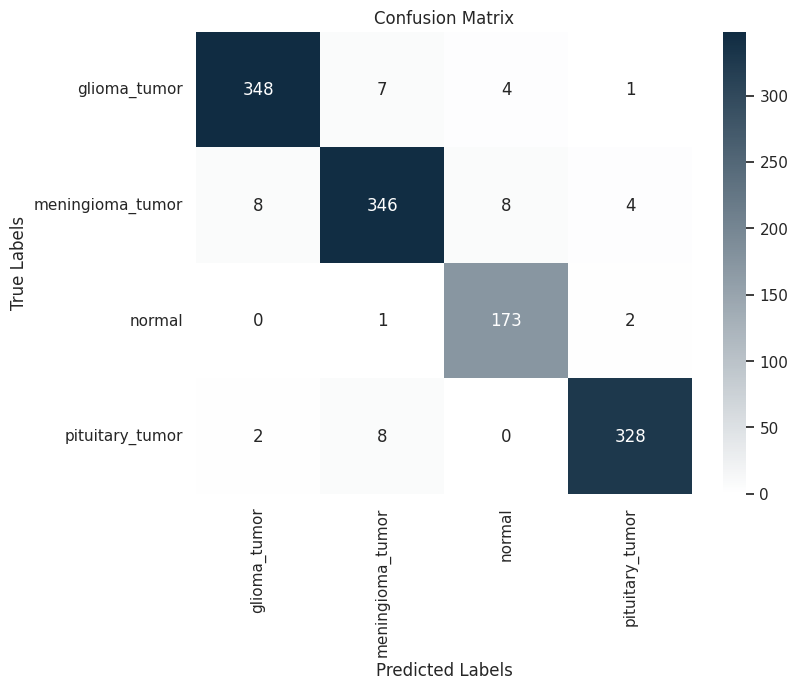

In [34]:
evaluate_model_performance(model, val_generator, classes)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>📈 Model Validation Performance Review</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        The model's validation performance is impressive. The confusion matrix shows that it can distinguish between the different tumor types with high accuracy, rarely confusing one type for another. The classification report further illustrates this with high precision and recall across all classes, indicating both a low number of false positives and false negatives. Specifically, the model is exceptionally precise in identifying 'normal' cases without tumors. Overall, the high F1-scores across all categories reflect a well-balanced model that performs consistently across the board.
    </p>
</div>


<a id="Save"></a>
# <p style="background-color: #102C42; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Saving the Model for Deployment</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#e9eef2; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0,0,0,0.1);">
    <p style="font-size:20px; font-family:calibri; line-height:1.5em; text-indent:20px;">
        In this final step, I am securing our hard work by saving the fully trained ResNet50V2 model. This includes both the model's weights and its architecture, ensuring we can deploy it effectively in a Web Application. I'll use a function to zip and download it, making it easily accessible for future use and deployment:
    </p>
</div>

In [35]:
# Save the entire ResNet50V2 model
model.save('ResNet50V2_model.h5')

In [36]:
def download_all_models(files, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    
    # Create a command to zip all files
    command = f"zip {zip_name} " + " ".join(files)
    
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    
    display(FileLink(f'{download_file_name}.zip'))

In [37]:
# List of model files to download
model_files = ['ResNet50V2_model.h5']

# Call the function with the list of files 
download_all_models(model_files, 'model_archive')

/kaggle/working/model_archive.zip

<h2 align="left"><font color=#102C42>Best Regards</font></h2>